## The time series is downloaded from TSDL.
## https://datamarket.com/data/set/22mh/monthly-sales-for-a-souvenir-shop-on-the-wharf-at-a-beach-resort-town-in-queensland-australia-jan-1987-dec-1993#!ds=22mh&display=line

In [1]:
SUV<-read.csv('monthly-sales-for-a-souvenir-sho.csv')
suv<-ts(SUV$Sales)


Attaching package: ‘forecast’

The following object is masked from ‘package:astsa’:

    gas



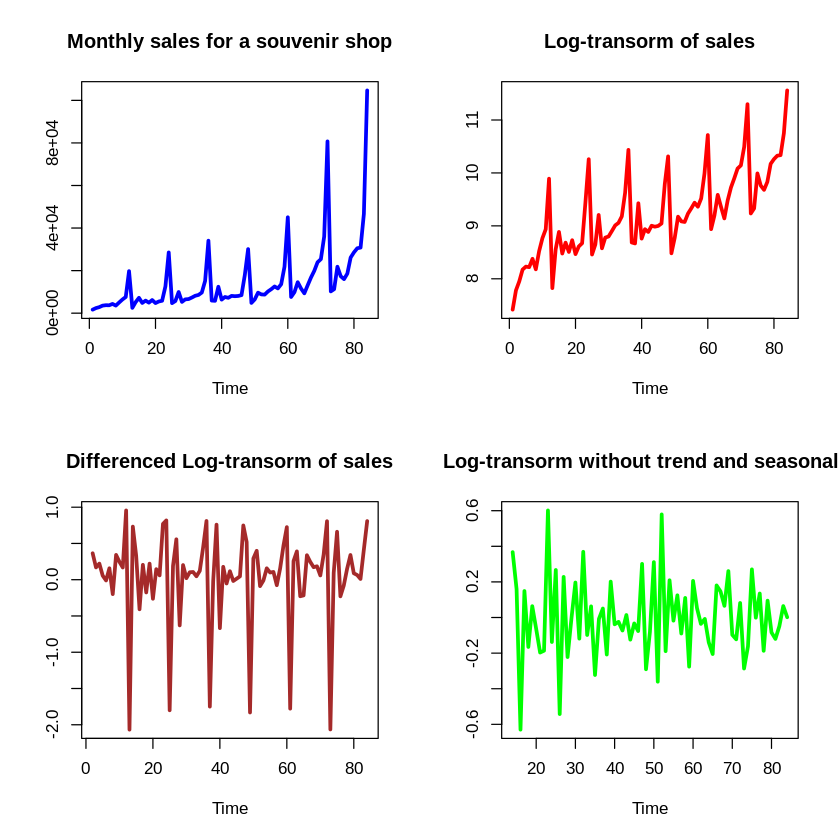

In [2]:
library(astsa)
library(forecast)



par(mfrow=c(2,2))

plot(suv, main='Monthly sales for a souvenir shop', ylab='', col='blue', lwd=3)
plot(log(suv), main='Log-transorm of sales', ylab='', col='red', lwd=3)  #Reomving the change in variance(statbilize variance)
plot(diff(log(suv)), main='Differenced Log-transorm of sales', ylab='', col='brown', lwd=3) # removing non seasonal trend
plot(diff(diff(log(suv)),12), main='Log-transorm without trend and seasonaliy', ylab='', col='green', lwd=3) #Removing seasonal trend

## From monthly sales for souvenir time plot of the monthly sales, we see the following. We see that some kind of seasonality going on
## there's a change in variation, there is seasonality.
## We can also see non seasonal trend


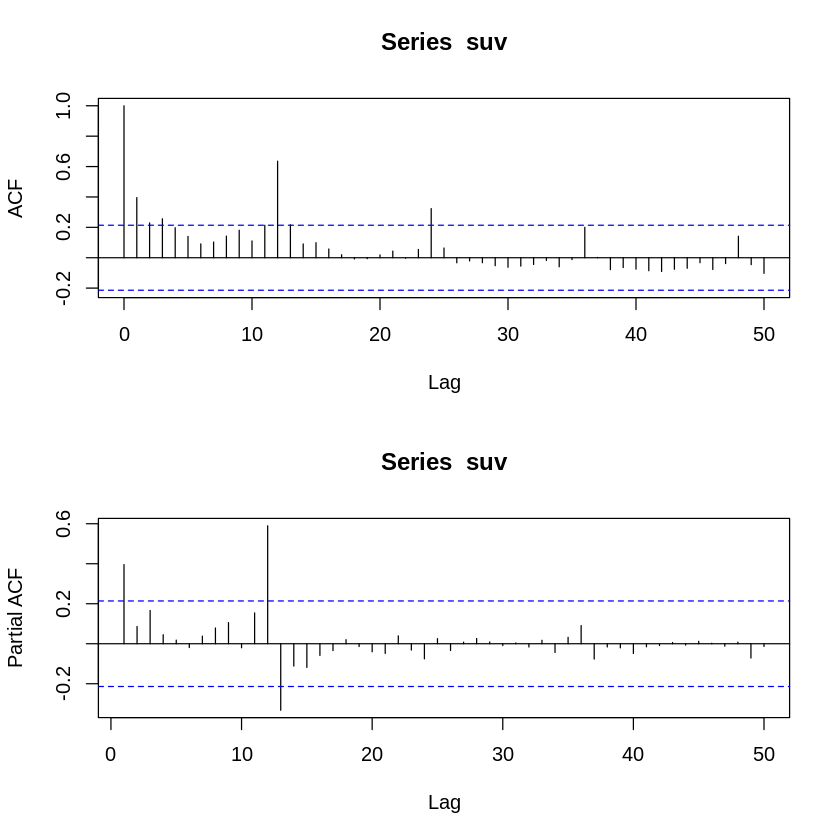

In [5]:
par(mfrow=c(2,1))
acf(suv,lag.max = 50)
pacf(suv,lag.max = 50)

## ACF will already tell us that if there is a seasonality or not. We can see autocorrelation at lag 12, lag 24, 36 and so forth.Seasonality is definitely existent in this data.
## Since there is already a trend and different variation - though we will have to do seasonal differencing, non-seasonal differencing - but even before all of these, since the variation is increasing, let's do a transformation first to stabilize the variance.

ACF,PACF
-0.46,-0.46
0.19,-0.02
-0.17,-0.11
-0.06,-0.23
0.01,-0.13
0.00,-0.07
-0.07,-0.20
0.07,-0.12
0.09,0.11
0.02,0.11


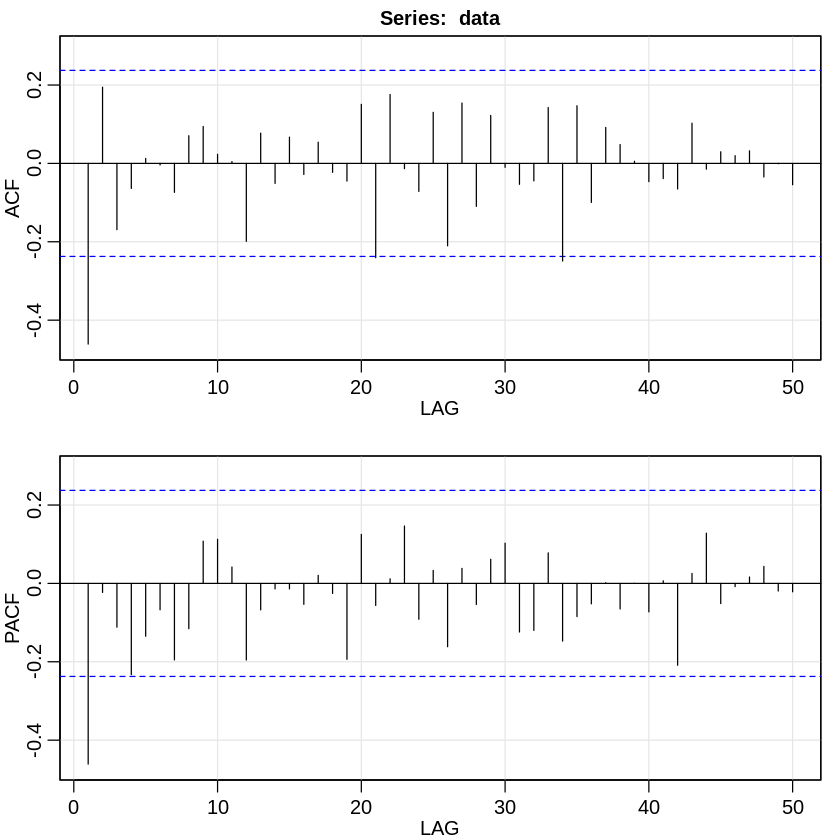

In [8]:
data<-diff(diff((log(suv)),12))
acf2(data, 50)

## looking at ACF and PACF of our transformed and non-seasonal and seasonal difference dataset, we see the following;
## we have one significant autocorrelation at lag 1 that will tell me that the q - the order of the moving average term is either 0 or 1.
## looking at seasonal lags
##  We see significant lag at 34, there's significant lag at 22. So. But we're going to try a few different values for seasonal moving average term mayb 0,1,2,3
## looking at PACF, which will tell me usually the order of autoregressive terms and/or seasonal autoregressive terms.
## we have a significant lag at 1; so our p can be 0 or 1.
## looking  at seasonal lags 12, 24 - there is no significant autocorrelations. So we are going to assume maybe that capital P is either 0 or 1 and we'll look at those values.
## ACF --- > q = 0,1 Q = 0,1,2,3
## PACF ---> p = 0,1  P = 0,1

In [11]:
d=1
DD=1
per=12
for(p in 1:2){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:4){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=log(suv), order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}

0 1 0 0 1 0 12 AIC= -11.60664  SSE= 3.432906  p-VALUE= 0.0001365566 
0 1 0 0 1 1 12 AIC= -16.09179  SSE= 2.97756  p-VALUE= 3.149952e-05 
0 1 0 0 1 2 12 AIC= -17.58234  SSE= 2.301963  p-VALUE= 0.0002456591 
0 1 0 0 1 3 12 AIC= -16.41016  SSE= 2.35266  p-VALUE= 0.0003392283 
0 1 0 1 1 0 12 AIC= -13.43083  SSE= 3.214065  p-VALUE= 4.083839e-05 
0 1 0 1 1 1 12 AIC= -17.76362  SSE= 2.399746  p-VALUE= 0.0001916565 
0 1 0 1 1 2 12 AIC= -15.99095  SSE= 2.349898  p-VALUE= 0.0002477783 
0 1 0 1 1 3 12 AIC= -14.74777  SSE= 2.302026  p-VALUE= 0.0004504596 
0 1 1 0 1 0 12 AIC= -27.78538  SSE= 2.643277  p-VALUE= 0.1742478 
0 1 1 0 1 1 12 AIC= -34.54538  SSE= 2.233424  p-VALUE= 0.2730783 
0 1 1 0 1 2 12 AIC= -33.6145  SSE= 2.109473  p-VALUE= 0.2830597 
0 1 1 0 1 3 12 AIC= -32.19273  SSE= 1.87789  p-VALUE= 0.270042 
0 1 1 1 1 0 12 AIC= -32.33192  SSE= 2.360507  p-VALUE= 0.2584529 
0 1 1 1 1 1 12 AIC= -34.0881  SSE= 1.842013  p-VALUE= 0.2843225 
0 1 1 1 1 2 12 AIC= -32.1017  SSE= 1.856343  p-VALUE= 0.28

## The best model with lowest AIC is
## 1 1 0 0 1 1 12 AIC= -34.98918  SSE= 2.209442  p-VALUE= 0.4633806 


initial  value -1.527727 
iter   2 value -1.675635
iter   3 value -1.682326
iter   4 value -1.682437
iter   5 value -1.682439
iter   5 value -1.682439
iter   5 value -1.682439
final  value -1.682439 
converged
initial  value -1.692103 
iter   2 value -1.704334
iter   3 value -1.707567
iter   4 value -1.707595
iter   5 value -1.707595
iter   5 value -1.707595
iter   5 value -1.707595
final  value -1.707595 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
          ar1     sma1
      -0.5017  -0.5107
s.e.   0.1013   0.1543

sigma^2 estimated as 0.03111:  log likelihood = 20.49,  aic = -34.99

$degrees_of_freedom
[1] 69

$ttable
     Estimate     SE t.value p.value
ar1   -0.5017 0.1013 -4.9531  0.0000
sma1  -0.5107 0.1543 -3.3098  0.0015

$AIC
[1] -2.422705

$AICc
[1] -2.395324

$BIC
[1] -3.364828


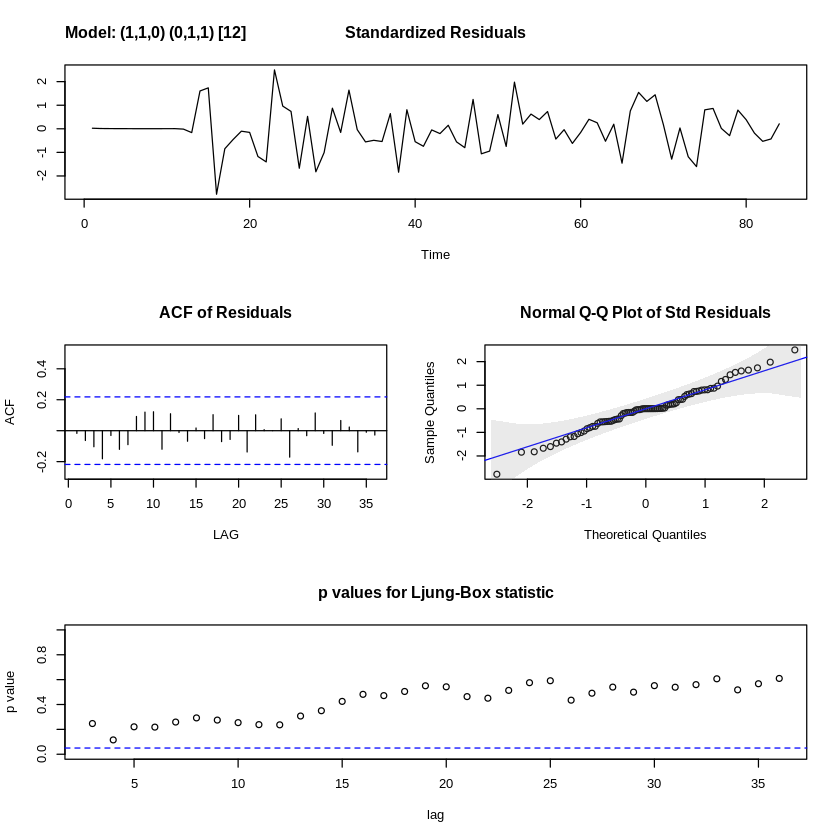

In [15]:


library(astsa)
sarima(log(suv), 1,1,0,0,1,1,12)

##  Residuals from the SARIMA model (1,1,0,0,1,1)12 are theStandardized Residuals. It looks white. There is no significant autocorrelation, sample autocorrelation. Looking at Q-Q plot, the middle part is linear, but then there is a systematic departure at the tails. But looking at the p values from Ljung.box statistics, it tells me that there is non-significant autocorrelation left in the residuals.

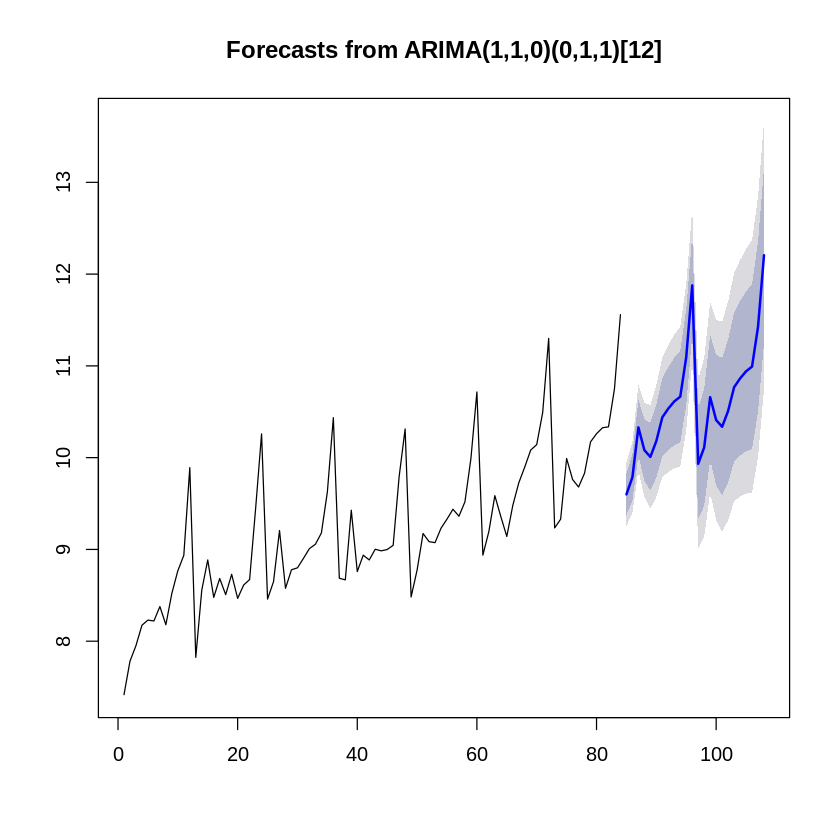

In [16]:
model<- arima(x=log(suv), order = c(1,1,0), seasonal = list(order=c(0,1,1), period=12))
plot(forecast(model))

In [17]:
forecast(model)

    Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
 85       9.600019  9.373968  9.826071  9.254303  9.945736
 86       9.786505  9.533944 10.039066  9.400246 10.172764
 87      10.329605 10.025423 10.633786  9.864399 10.794810
 88      10.081973  9.746705 10.417240  9.569225 10.594720
 89      10.008096  9.638604 10.377587  9.443007 10.573184
 90      10.181170  9.783094 10.579245  9.572365 10.789974
 91      10.439372 10.013362 10.865383  9.787845 11.090900
 92      10.534857 10.083237 10.986477  9.844164 11.225551
 93      10.613026 10.136886 11.089165  9.884833 11.341218
 94      10.664526 10.165207 11.163846  9.900883 11.428170
 95      11.096784 10.575248 11.618321 10.299163 11.894406
 96      11.877167 11.334355 12.419979 11.047007 12.707326
 97       9.932756  9.330373 10.535139  9.011491 10.854022
 98      10.112194  9.475681 10.748707  9.138731 11.085657
 99      10.658829  9.980844 11.336814  9.621940 11.695718
100      10.409423  9.696788 11.122058  9.319542 11.4993

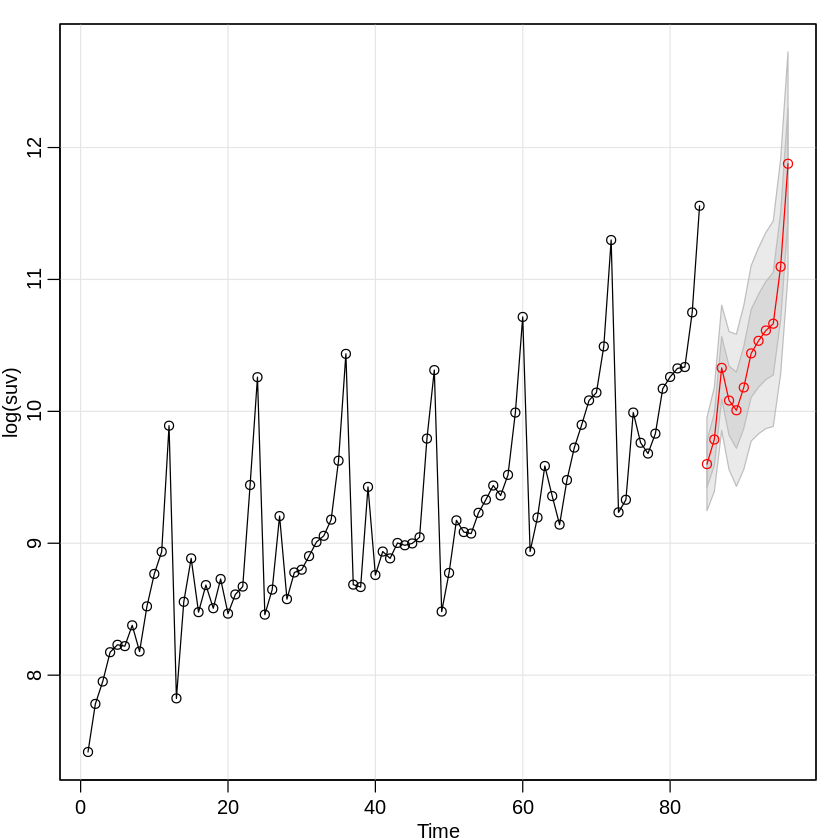

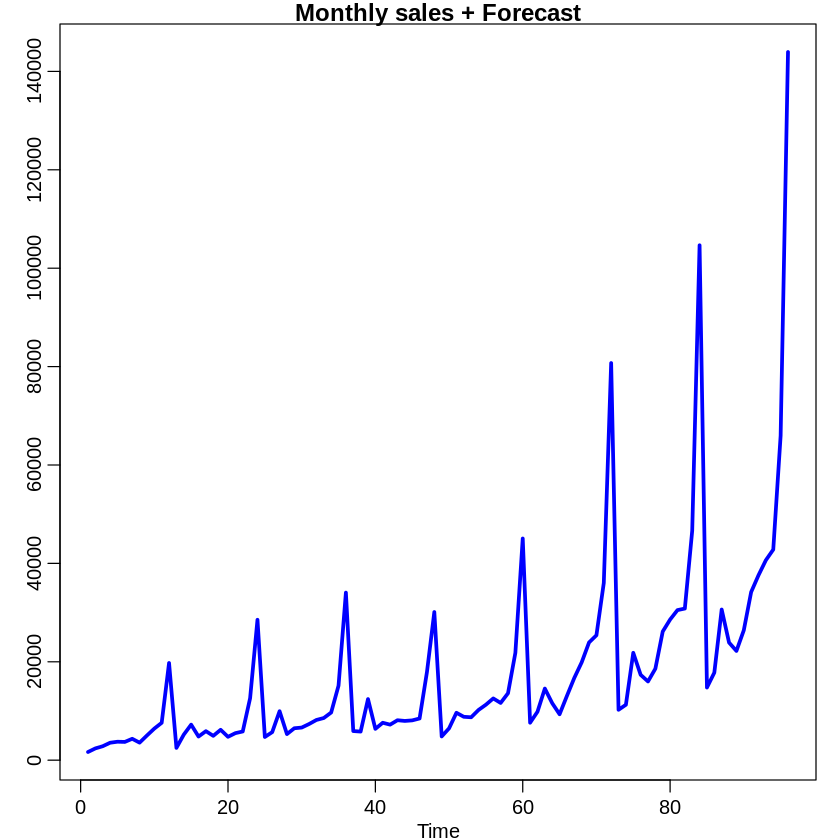

In [18]:
a<-sarima.for(log(suv),12,1,1,0,0,1,1,12)

plot.ts(c(suv,exp(a$pred)), main='Monthly sales + Forecast', ylab='', col='blue', lwd=3)

initial  value -1.514760 
iter   2 value -1.695511
iter   3 value -1.715066
iter   4 value -1.726333
iter   5 value -1.727082
iter   6 value -1.731339
iter   7 value -1.731666
iter   8 value -1.731710
iter   9 value -1.731712
iter  10 value -1.731712
iter  10 value -1.731712
final  value -1.731712 
converged
initial  value -1.744135 
iter   2 value -1.749347
iter   3 value -1.753455
iter   4 value -1.753841
iter   5 value -1.753858
iter   6 value -1.753865
iter   7 value -1.753865
iter   7 value -1.753865
iter   7 value -1.753865
final  value -1.753865 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
          ma1     ma2      ma3     sma1
      -0.5776  0.2528  -0.3902  -0.5142
s.e.   0.1063  0.1370   0.1442   0.1661

sigma^2 estimated as 0.02807:  log likelihood = 23.78,  aic = -37.56

$degrees_of_freedom
[1] 67

$ttable
     Estimate     SE t.value p.value
ma1   -0.5776 0.1063 -5.4333  0.0000
ma2    0.2528 0.1370  1.8454  0.0694
ma3   -0.3902 0.1442 -2.7063  0.0086
sma1  -0.5142 0.1661 -3.0965  0.0029

$AIC
[1] -2.477914

$AICc
[1] -2.444947

$BIC
[1] -3.362161


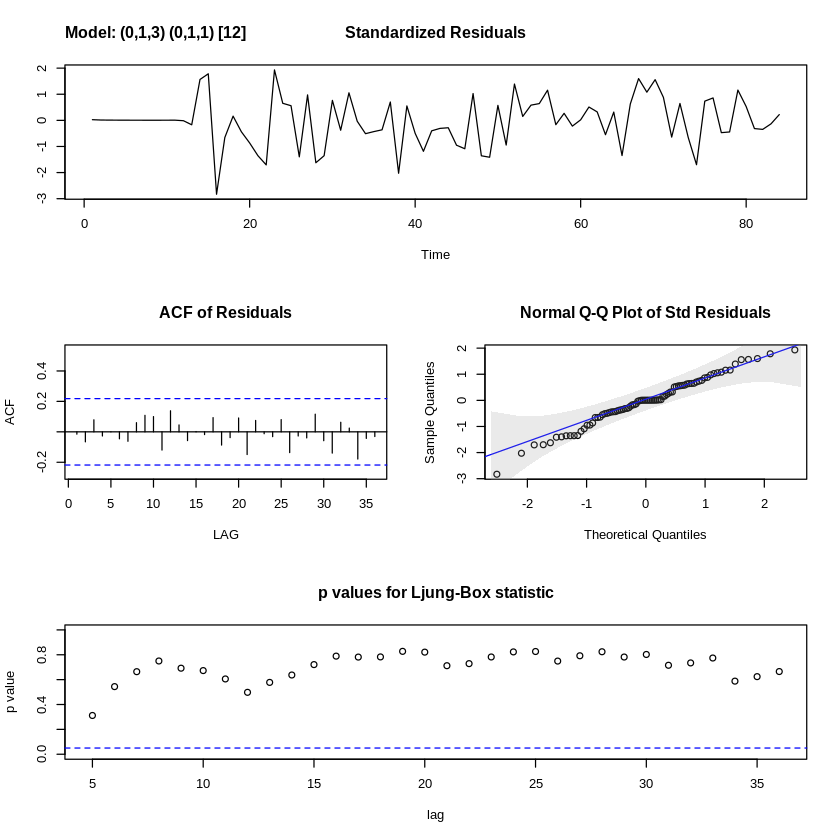

In [23]:
sarima(log(suv), 0,1,3,0,1,1,12)